# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [99]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import Imputer
%matplotlib inline

### Step 2: Read in your data set 

In [100]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [101]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [102]:
df_raw.shape

(400, 4)

Answer: 400

#### Question 2. Create a summary table

In [103]:
#function

In [104]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The intervals for GRE scores are larger.

#### Question 4. Drop data points with missing data


In [105]:
df = df_raw.dropna()
df.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: All the columns now have the same number of values in count(). 

#### Question 6. Create box plots for GRE and GPA

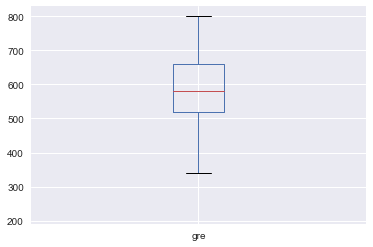

In [106]:
#boxplot 1
df['gre'].plot(kind='box')

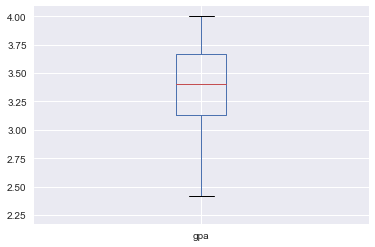

In [107]:
df['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: The interquartile range is wider for GPA and more of the values fall on the lower end of the range.

#### Question 8. Describe each distribution 

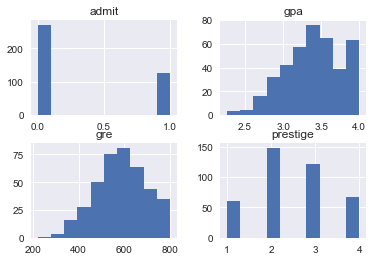

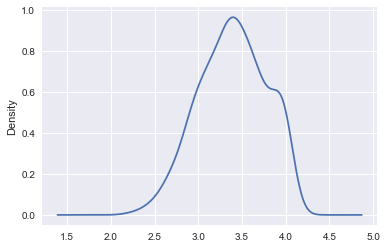

In [108]:
# plot the distribution of each variable 
df.hist()
pl.show()
df['gpa'].plot(kind='density')

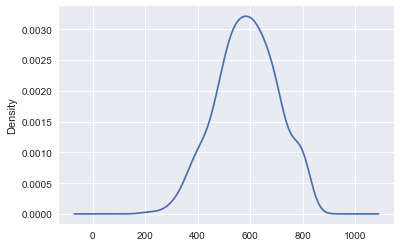

In [109]:
df['gre'].plot(kind='density')

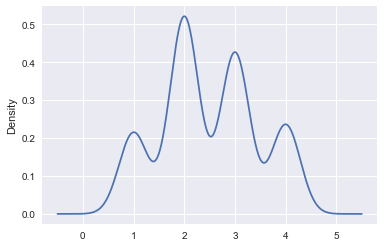

In [110]:
df['prestige'].plot(kind='density')

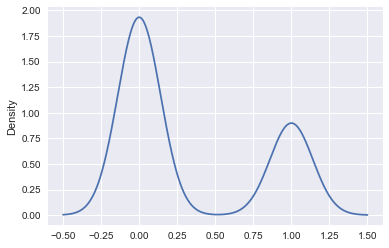

In [111]:
df['admit'].plot(kind='density')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: For GPA and GRE, the data looks close to normal though there may be a bit of a left tail on both and kurtosis on GPA.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: I don't think so, though depending on how we end up using the data (like if we needed to present averages), we could throw out the outliers.

#### Question 11. Which of our variables are potentially colinear? 

In [112]:
# create a correlation matrix for the data


In [113]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: None of the variables look very strongly correlated.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

In [114]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='admit ~ prestige', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     24.91
Date:                Tue, 18 Apr 2017   Prob (F-statistic):           9.02e-07
Time:                        13:01:10   Log-Likelihood:                -247.58
No. Observations:                 397   AIC:                             499.2
Df Residuals:                     395   BIC:                             507.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6157      0.064      9.630      0.000         0.490     0.741
prestige      -0.1199      0.024     -4.991      0.000        -0.167    -0.073
==============================================================================
Omnibus:                      289.617   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.484
Skew:                           0.718   Prob(JB):                     2.00e-13
Kurtosis:                       1.785   Cond. No.                         8.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Answer: Use Statsmodels to estimate the association between prestige and admission.

#### Question 14. What is your hypothesis? 

Answer: My hypothesis would have been that students who attended more prestigious colleges are more likely to be admitted to graduate school. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data
Make assumptions to fill in the missing data based on other variables you have.

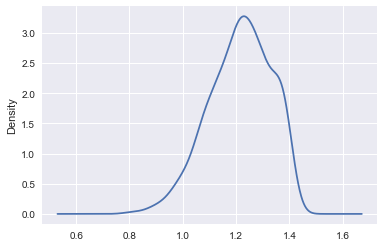

In [115]:
df_new = np.log(df['gpa'])
df_new.plot(kind='density')

#### 2. Bonus: Log transform the skewed data
df_new = np.log(df['gpa'])
df_new = np.log(df['gre'])

#### 3. Advanced: Impute missing data

In [119]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
df_other = imp.fit_transform(df_raw)
print df_other

[[   0.    380.      3.61    3.  ]
 [   1.    660.      3.67    3.  ]
 [   1.    800.      4.      1.  ]
 ..., 
 [   0.    460.      2.63    2.  ]
 [   0.    700.      3.65    2.  ]
 [   0.    600.      3.89    3.  ]]
